In [34]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [45]:
data=pd.read_csv('/content/drive/MyDrive/ML Lab test/Datasets/Play_Tennis.csv')
data.head

<bound method NDFrame.head of      outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no>

In [27]:
le=LabelEncoder()
nb=GaussianNB()

In [28]:
outlook=le.fit_transform(data['outlook'])
temp=le.fit_transform(data['temp'])
humidity=le.fit_transform(data['humidity'])
windy=le.fit_transform(data['windy'])
play=le.fit_transform(data['play'])

In [29]:
features=tuple(zip(outlook,temp,humidity,windy))

In [30]:
nb.fit(features,play)

GaussianNB()

In [31]:
new=[0,1,0,1]

In [33]:
nb.predict([new])

array([1])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, play, test_size=0.33, random_state=42)


In [36]:
nb.fit(X_train,y_train)

GaussianNB()

In [37]:
predictions=nb.predict(X_test)

In [40]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


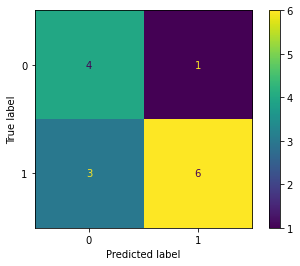

In [46]:
plot_confusion_matrix(nb,features,play)

In [47]:
c=confusion_matrix(y_test,predictions)

In [49]:
c[0][1]

1

In [50]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


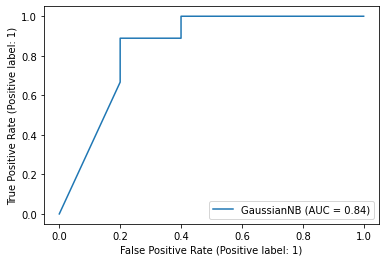

In [51]:
plot_roc_curve(nb,features,play)